In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [177]:
df = pd.read_csv('../Datasets/Zomato.csv')

In [178]:
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [179]:
dup_groups = df[df.duplicated(subset=['name'], keep=False)]

# Compare side by side
dup_groups.sort_values('name')

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
25,CAFE NOVA,No,No,3.2/5,11,600,Cafes
104,CAFE NOVA,No,No,3.2/5,11,600,Dining
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
44,Onesta,Yes,Yes,4.6/5,2556,600,other
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
14,San Churro Cafe,Yes,No,3.8/5,918,800,Cafes


There are some restaurants where 2 types of eating is preferred by people. Coincidentaly all its factors remain same which is very rare

In [180]:
print(df.columns.tolist())

['name', 'online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'listed_in(type)']


In [181]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (148, 7)


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [183]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [184]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)
df['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

In [185]:
Q1 = np.quantile(df['votes'],0.25)
Q3 = np.quantile(df['votes'],0.75)

IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

count = sum((x<lower) or (x>upper) for x in df['votes'])

print(f"Lower: {lower}")
print(f"Upper: {upper}")
print(f"Count of outliers in votes:{count}")

z_score = np.abs(stats.zscore(df['votes']))
countz = sum(z_score<3)
print(f"Count of outliers in votes:{countz}")

Lower: -315.75
Upper: 544.25
Count of outliers in votes:19
Count of outliers in votes:144


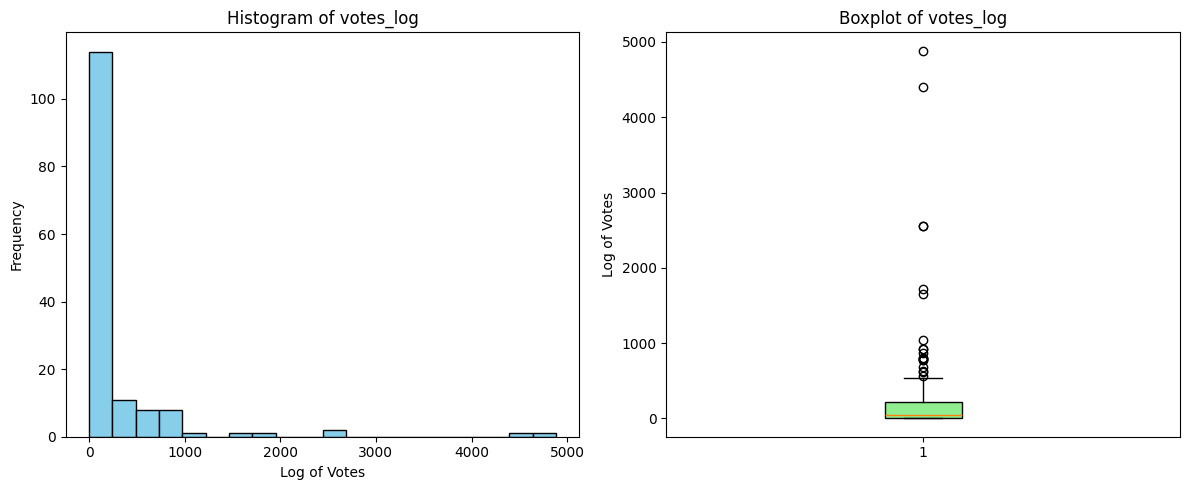

In [186]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Histogram
axes[0].hist(df['votes'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of votes_log')
axes[0].set_xlabel('Log of Votes')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(df['votes'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Boxplot of votes_log')
axes[1].set_ylabel('Log of Votes')

plt.tight_layout()
plt.show()

In [187]:
df['votes_log'] = np.log1p(df['votes'])  # log transform

Q1 = np.quantile(df['votes_log'],0.25)
Q3 = np.quantile(df['votes_log'],0.75)

IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

count = sum((x<lower) or (x>upper) for x in df['votes_log'])

print(f"Lower: {lower}")
print(f"Upper: {upper}")
print(f"Count of outliers in votes:{count}")

Lower: -2.9935908972828176
Upper: 10.445474678201244
Count of outliers in votes:0


In [188]:
df['votes_log']

0      6.654153
1      6.669498
2      6.823286
3      4.488636
4      5.117994
         ...   
143    0.000000
144    0.000000
145    6.648985
146    4.595120
147    3.871201
Name: votes_log, Length: 148, dtype: float64

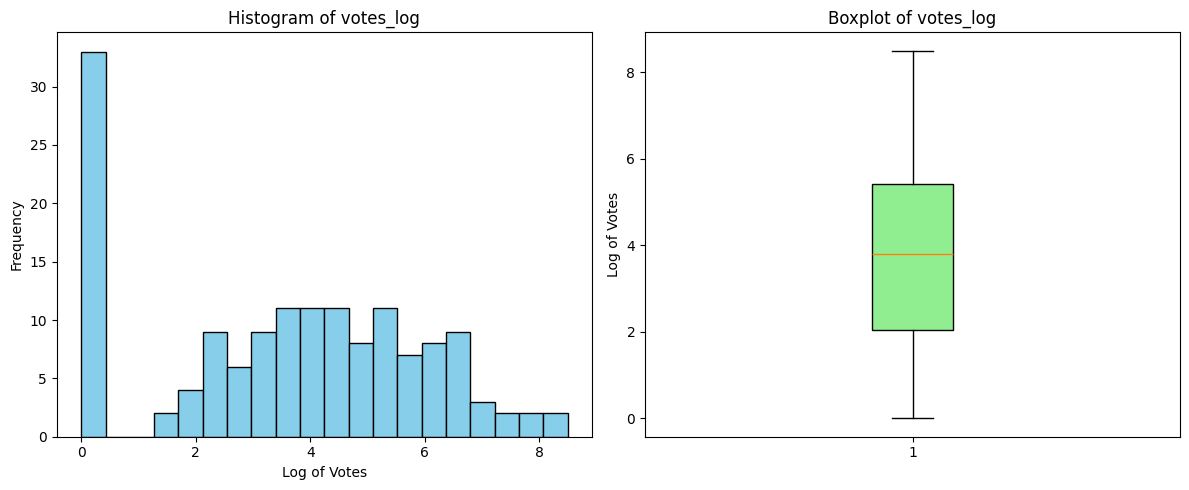

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Histogram
axes[0].hist(df['votes_log'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of votes_log')
axes[0].set_xlabel('Log of Votes')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(df['votes_log'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Boxplot of votes_log')
axes[1].set_ylabel('Log of Votes')

plt.tight_layout()
plt.show()

In [190]:
correlation = df['rate'].corr(df['votes_log'])
print("Correlation between rate and votes_log:", correlation)

covariance = df['rate'].cov(df['votes_log'])
print("Covariance between rate and votes_log:", covariance)

Correlation between rate and votes_log: 0.5998234002604741
Covariance between rate and votes_log: 0.5752271027692498


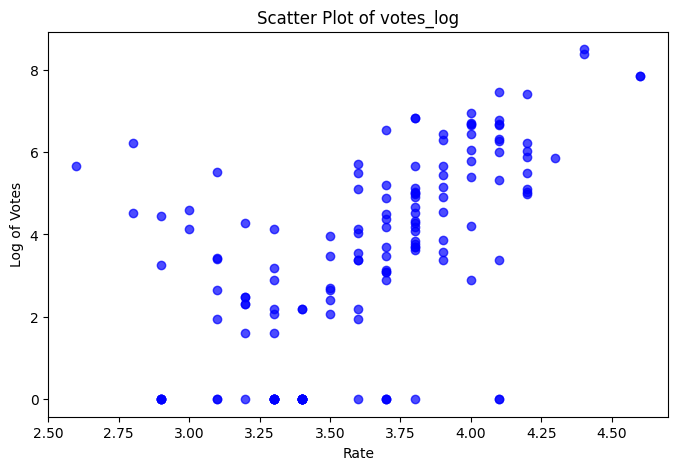

In [191]:
plt.figure(figsize=(8,5))
plt.scatter(df['rate'], df['votes_log'], color='blue', alpha=0.7)
plt.title('Scatter Plot of votes_log')
plt.xlabel('Rate')
plt.ylabel('Log of Votes')
plt.show()

We can see that the rate and vote of people show a positive correlation but its strength is not that great suggesting a mixed emotions. Its relevant as there are many restaurants with 0 votes suggesting that it might have opened very recently so not many people have tried it

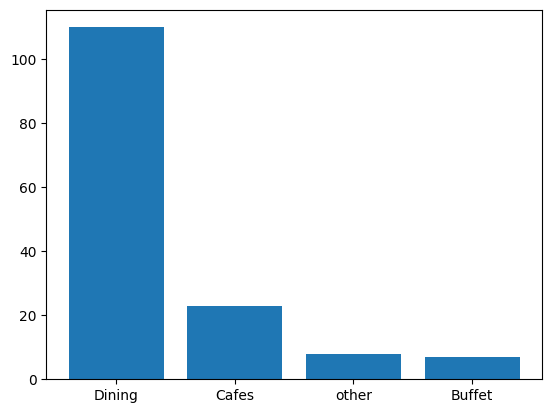

In [192]:
type_count = df['listed_in(type)'].value_counts()

plt.bar(type_count.index,type_count.values)
plt.show()

Most people prefer dining in the restaurant

Text(0.5, 0, 'Type of restaurant')

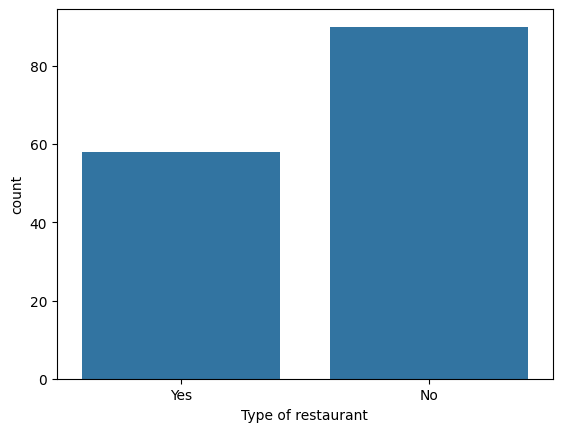

In [193]:
sns.countplot(x=df['online_order'])
plt.xlabel("Type of restaurant")

Text(0.5, 0, 'Type of restaurant')

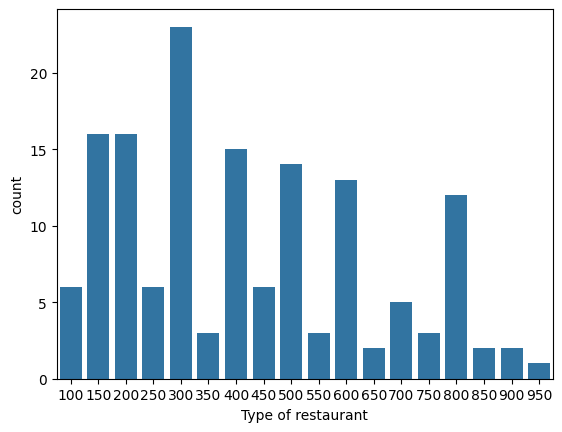

In [194]:
sns.countplot(x=df['approx_cost(for two people)'])
plt.xlabel("Type of restaurant")

In [195]:
df['online'] = df['online_order'].map({'No': 0, 'Yes': 1})
df['online']

0      1
1      1
2      1
3      0
4      0
      ..
143    0
144    0
145    1
146    0
147    1
Name: online, Length: 148, dtype: int64

<Axes: xlabel='online', ylabel='rate'>

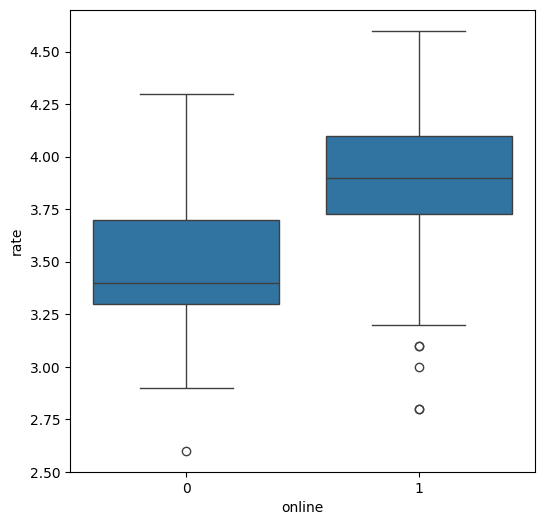

In [196]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online', y = 'rate', data = df)

In [197]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['listed_in(type)'])

In [198]:
df['type']

0      0
1      0
2      0
3      0
4      0
      ..
143    2
144    2
145    2
146    2
147    2
Name: type, Length: 148, dtype: int64

In [199]:
correlation = df['online'].corr(df['type'])

print(correlation)

-0.12994655709241953


In [203]:
print(f"Restaurant with highest rating: {df['rate'].max()}")
restaurant = df.loc[df['rate'] == df['rate'].max(), 'name']
print(f"Restaurant:{restaurant.unique()}")

Restaurant with highest rating: 4.6
Restaurant:['Onesta']


In [205]:
print(f"Restaurant with highest approx cost for a couple: {df['approx_cost(for two people)'].max()}")
restaurant = df.loc[df['approx_cost(for two people)'] == df['approx_cost(for two people)'].max(), 'name']
print(f"Restaurant:{restaurant.unique()}")

Restaurant with highest approx cost for a couple: 950
Restaurant:['Ayda Persian Kitchen']
